In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mplt
import random
from math import *
import sklearn as svm
import seaborn as sns
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

**Analysis of customer demographics and sales data**

**Reading data into pandas dataframe and getting to know some basic details**

In [3]:
data = pd.read_excel("/content/Customer_demographics_and_sales_Lab5.xlsx")
print(data.head())
# file path: "C:\Users\oscar\OneDrive\Pulpit\Data Analytics Study Materials\Practice datasets\Customer_demographics_and_sales_Lab5.xlsx"

         CUST_NAME Gender_Code              ADDRESS1   CITY STATE  \
0  Allen Perl              Mr.  4707  Hillcrest Lane  Abeto    PG   
1  Allen Perl              Mr.  4707  Hillcrest Lane  Abeto    PG   
2  Allen Perl              Mr.  4707  Hillcrest Lane  Abeto    PG   
3  Allen Perl              Mr.  4707  Hillcrest Lane  Abeto    PG   
4  Allen Perl              Mr.  4707  Hillcrest Lane  Abeto    PG   

  COUNTRY_CODE POSTAL_CODE  POSTAL_CODE_PLUS4  ADDRESS2  \
0           IT        6040                  0       NaN   
1           IT        6040                  0       NaN   
2           IT        6040                  0       NaN   
3           IT        6040                  0       NaN   
4           IT        6040                  0       NaN   

              EMAIL_ADDRESS  ... Cleaning Products Condiments  Frozen Foods  \
0  Allen.M.Perl@spambob.com  ...                 0          1             0   
1  Allen.M.Perl@spambob.com  ...                 1          0           

In [5]:
dataframe = pd.DataFrame(data)
print(dataframe.head())

         CUST_NAME Gender_Code              ADDRESS1   CITY STATE  \
0  Allen Perl              Mr.  4707  Hillcrest Lane  Abeto    PG   
1  Allen Perl              Mr.  4707  Hillcrest Lane  Abeto    PG   
2  Allen Perl              Mr.  4707  Hillcrest Lane  Abeto    PG   
3  Allen Perl              Mr.  4707  Hillcrest Lane  Abeto    PG   
4  Allen Perl              Mr.  4707  Hillcrest Lane  Abeto    PG   

  COUNTRY_CODE POSTAL_CODE  POSTAL_CODE_PLUS4  ADDRESS2  \
0           IT        6040                  0       NaN   
1           IT        6040                  0       NaN   
2           IT        6040                  0       NaN   
3           IT        6040                  0       NaN   
4           IT        6040                  0       NaN   

              EMAIL_ADDRESS  ... Cleaning Products Condiments  Frozen Foods  \
0  Allen.M.Perl@spambob.com  ...                 0          1             0   
1  Allen.M.Perl@spambob.com  ...                 1          0           

**Getting to know some basic data about the dataframe**

In [6]:
dataframe.info

<bound method DataFrame.info of               CUST_NAME Gender_Code                    ADDRESS1  \
0       Allen Perl              Mr.        4707  Hillcrest Lane   
1       Allen Perl              Mr.        4707  Hillcrest Lane   
2       Allen Perl              Mr.        4707  Hillcrest Lane   
3       Allen Perl              Mr.        4707  Hillcrest Lane   
4       Allen Perl              Mr.        4707  Hillcrest Lane   
..                  ...         ...                         ...   
189   Rebecca Uresti           Mrs.       4333 Morningview Lane   
190     Emma Perez             Mrs.  1199 Lightning Point Drive   
191   Reynaldo Myers            Mr.    3923 Black Stallion Road   
192   Reynaldo Myers            Mr.    3923 Black Stallion Road   
193  Jennifer Becker           Mrs.         4374 Lindale Avenue   

              CITY STATE COUNTRY_CODE POSTAL_CODE  POSTAL_CODE_PLUS4  \
0            Abeto    PG           IT        6040                  0   
1            Abeto    PG           IT        6040                  0   
2            Abeto    PG           IT        6040                  0   
3            Abeto    PG           IT        6040                  0   
4            Abeto    PG           IT        6040                  0   
..             ...   ...          ...         ...                ...   
189     Birmingham    AL           US       35203                  0   
190     Black Hawk    SD           US       57718                  0   
191  Blaxland East   NSW           AU        2774                  0   
192  Blaxland East   NSW           AU        2774                  0   
193    Bloomington    IL           US       61701                  0   

     ADDRESS2                    EMAIL_ADDRESS  ... Cleaning Products  \
0         NaN         Allen.M.Perl@spambob.com  ...                 0   
1         NaN         Allen.M.Perl@spambob.com  ...                 1   
2         NaN         Allen.M.Perl@spambob.com  ...                 0   
3         NaN         Allen.M.Perl@spambob.com  ...                 0   
4         NaN         Allen.M.Perl@spambob.com  ...                 0   
..        ...                              ...  ...               ...   
189       NaN  Rebecca.C.Uresti@trashymail.com  ...                 0   
190       NaN         Emma.V.Perez@spambob.com  ...                 0   
191       NaN    Reynaldo.J.Myers@pookmail.com  ...                 0   
192       NaN    Reynaldo.J.Myers@pookmail.com  ...                 0   
193       NaN    Jennifer.D.Becker@spambob.com  ...                 0   

    Condiments  Frozen Foods Kitchen Items Meat Office Supplies  \
0            1             0             0    0               0   
1            0             0             0    0               0   
2            0             0             0    0               0   
3            0             0             0    0               0   
4            0             0             0    0               0   
..         ...           ...           ...  ...             ...   
189          0             0             0    0               0   
190          0             0             0    0               0   
191          1             0             0    0               0   
192          1             0             0    0               0   
193          0             0             0    0               0   

     Personal Care  Pet Supplies  Sea Food  Spices  
0                0             0         0       0  
1                0             0         0       0  
2                0             0         0       0  
3                0             0         0       0  
4                0             0         0       0  
..             ...           ...       ...     ...  
189              0             0         0       0  
190              0             0         0       0  
191              0             0         0       0  
192              0             0         0       0  
193              0             0 

In [7]:
dataframe.describe

<bound method NDFrame.describe of               CUST_NAME Gender_Code                    ADDRESS1  \
0       Allen Perl              Mr.        4707  Hillcrest Lane   
1       Allen Perl              Mr.        4707  Hillcrest Lane   
2       Allen Perl              Mr.        4707  Hillcrest Lane   
3       Allen Perl              Mr.        4707  Hillcrest Lane   
4       Allen Perl              Mr.        4707  Hillcrest Lane   
..                  ...         ...                         ...   
189   Rebecca Uresti           Mrs.       4333 Morningview Lane   
190     Emma Perez             Mrs.  1199 Lightning Point Drive   
191   Reynaldo Myers            Mr.    3923 Black Stallion Road   
192   Reynaldo Myers            Mr.    3923 Black Stallion Road   
193  Jennifer Becker           Mrs.         4374 Lindale Avenue   

              CITY STATE COUNTRY_CODE POSTAL_CODE  POSTAL_CODE_PLUS4  \
0            Abeto    PG           IT        6040                  0   
1            Abeto    PG           IT        6040                  0   
2            Abeto    PG           IT        6040                  0   
3            Abeto    PG           IT        6040                  0   
4            Abeto    PG           IT        6040                  0   
..             ...   ...          ...         ...                ...   
189     Birmingham    AL           US       35203                  0   
190     Black Hawk    SD           US       57718                  0   
191  Blaxland East   NSW           AU        2774                  0   
192  Blaxland East   NSW           AU        2774                  0   
193    Bloomington    IL           US       61701                  0   

     ADDRESS2                    EMAIL_ADDRESS  ... Cleaning Products  \
0         NaN         Allen.M.Perl@spambob.com  ...                 0   
1         NaN         Allen.M.Perl@spambob.com  ...                 1   
2         NaN         Allen.M.Perl@spambob.com  ...                 0   
3         NaN         Allen.M.Perl@spambob.com  ...                 0   
4         NaN         Allen.M.Perl@spambob.com  ...                 0   
..        ...                              ...  ...               ...   
189       NaN  Rebecca.C.Uresti@trashymail.com  ...                 0   
190       NaN         Emma.V.Perez@spambob.com  ...                 0   
191       NaN    Reynaldo.J.Myers@pookmail.com  ...                 0   
192       NaN    Reynaldo.J.Myers@pookmail.com  ...                 0   
193       NaN    Jennifer.D.Becker@spambob.com  ...                 0   

    Condiments  Frozen Foods Kitchen Items Meat Office Supplies  \
0            1             0             0    0               0   
1            0             0             0    0               0   
2            0             0             0    0               0   
3            0             0             0    0               0   
4            0             0             0    0               0   
..         ...           ...           ...  ...             ...   
189          0             0             0    0               0   
190          0             0             0    0               0   
191          1             0             0    0               0   
192          1             0             0    0               0   
193          0             0             0    0               0   

     Personal Care  Pet Supplies  Sea Food  Spices  
0                0             0         0       0  
1                0             0         0       0  
2                0             0         0       0  
3                0             0         0       0  
4                0             0         0       0  
..             ...           ...       ...     ...  
189              0             0         0       0  
190              0             0         0       0  
191              0             0         0       0  
192              0             0         0       0  
193              0             

**Lets see the plots of some basic data combinations**

**Lets check all the columns and then plot some together**

In [8]:
columns = dataframe.columns
print(columns)

Index(['CUST_NAME', 'Gender_Code', 'ADDRESS1', 'CITY', 'STATE', 'COUNTRY_CODE',
       'POSTAL_CODE', 'POSTAL_CODE_PLUS4', 'ADDRESS2', 'EMAIL_ADDRESS',
       'PHONE_NUMBER', 'CREDITCARD_TYPE', 'LOCALITY', 'SALESMAN_ID',
       'NATIONALITY', 'NATIONAL_ID', 'CREDITCARD_NUMBER', 'DRIVER_LICENSE',
       'CUST_ID', 'ORDER_ID', 'ORDER_DATE', 'ORDER_TIME', 'FREIGHT_CHARGES',
       'ORDER_SALESMAN', 'ORDER_POSTED_DATE', 'ORDER_SHIP_DATE', 'AGE',
       'ORDER_VALUE', 'T_TYPE', 'PURCHASE_TOUCHPOINT', 'PURCHASE_STATUS',
       'ORDER_TYPE', 'GENERATION', 'Baby Food', 'Diapers', 'Formula', 'Lotion',
       'Baby wash', 'Wipes', 'Fresh Fruits', 'Fresh Vegetables', 'Beer',
       'Wine', 'Club Soda', 'Sports Drink', 'Chips', 'Popcorn', 'Oatmeal',
       'Medicines', 'Canned Foods', 'Cigarettes', 'Cheese',
       'Cleaning Products', 'Condiments', 'Frozen Foods', 'Kitchen Items',
       'Meat', 'Office Supplies', 'Personal Care', 'Pet Supplies', 'Sea Food',
       'Spices'],
      dtype='object'

**First lets have the following visualizations:



*   List item 1: Country code vs credit card type (lets see what credit card is more popular in each country). Histogram
*   List item 2: nationality vs order value: lets see what country orders the most (histogram)

*   List item 3: age vs generation (scatter plot)**



**Of the columns Country Code and Creditcard Type lets see first:**
**
*   Country code values
*   Country code count total


*   Credit card values
*   Credit card count total
**










In [9]:
#country code values
country_code = dataframe['COUNTRY_CODE']
print(country_code)

# ccountry code count total
country_code_count = dataframe['COUNTRY_CODE'].value_counts()
print(country_code_count)

# credit card values
credit_card_type = dataframe['CREDITCARD_TYPE']
print(credit_card_type)

# credit card count total
credit_card_type_count = dataframe['CREDITCARD_TYPE'].value_counts()
print(credit_card_type_count)

0      IT
1      IT
2      IT
3      IT
4      IT
       ..
189    US
190    US
191    AU
192    AU
193    US
Name: COUNTRY_CODE, Length: 194, dtype: object
COUNTRY_CODE
US    101
IT     38
ES     18
AU     18
DE     10
FR      8
CA      1
Name: count, dtype: int64
0           Master Card
1           Master Card
2           Master Card
3           Master Card
4           Master Card
             ...       
189                VISA
190    American Express
191    American Express
192    American Express
193                 JCB
Name: CREDITCARD_TYPE, Length: 194, dtype: object
CREDITCARD_TYPE
Diners Club         44
VISA                41
American Express    39
JCB                 25
EDiscovery          22
Master Card         16
American Expres      7
Name: count, dtype: int64


**1. Country code vs credit card type (histogram) Matplotlib**

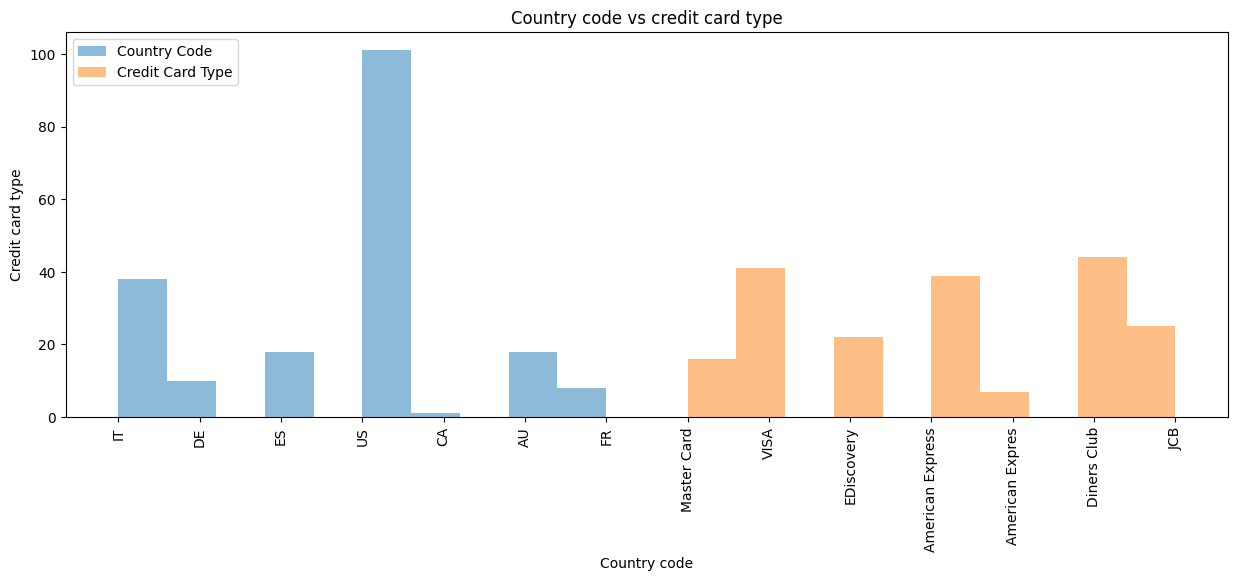

In [29]:
country_code = dataframe['COUNTRY_CODE']
credit_card_type = dataframe['CREDITCARD_TYPE']

fig = plt.figure(figsize = (15, 5))
plt.hist(country_code, bins=10, alpha=0.5, label='Country Code')
plt.hist(credit_card_type, bins=10, alpha=0.5, label='Credit Card Type')
plt.xticks(rotation=90)
plt.title("Country code vs credit card type")
plt.xlabel("Country code")
plt.ylabel("Credit card type")
plt.legend(loc = "upper left")
plt.show()

2. **Country code vs credit card type (histogram) Plotly**

In [30]:
country_code = dataframe['COUNTRY_CODE']
credit_card_type = dataframe['CREDITCARD_TYPE']
fig = px.histogram(dataframe, x="COUNTRY_CODE", y="CREDITCARD_TYPE", title="Country code vs credit card type")
fig.show()

**Of the columns Nationality and order value Type lets see first:**

*   Nationality values
*   Nationality count total


*   Order value values
*   Order value count total

In [15]:
# nationality values

nationality = dataframe['NATIONALITY']
print(nationality)

# nationality count total values

nationality_count = dataframe['NATIONALITY'].value_counts()
print(nationality_count)

# order value values

order_value = dataframe['ORDER_VALUE']
print(order_value)

# order value count total values

order_value_count = dataframe['ORDER_VALUE'].value_counts()
print(order_value_count)

0      U.S.
1      U.S.
2      U.S.
3      U.S.
4      U.S.
       ... 
189      UK
190      FR
191      FR
192      FR
193      FR
Name: NATIONALITY, Length: 194, dtype: object
NATIONALITY
FR      56
IT      41
ES      33
U.S.    27
CA      24
UK      13
Name: count, dtype: int64
0      134.24
1       53.40
2       26.25
3        5.65
4       44.43
        ...  
189      8.49
190     33.33
191     30.71
192     27.48
193    165.72
Name: ORDER_VALUE, Length: 194, dtype: float64
ORDER_VALUE
190.12    2
27.45     2
134.24    1
16.00     1
114.25    1
         ..
127.03    1
39.74     1
44.29     1
46.36     1
165.72    1
Name: count, Length: 192, dtype: int64


**3. Nationality vs order value. Histogram using Matplotlib**

<ipython-input-28-605ca2ef790e>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



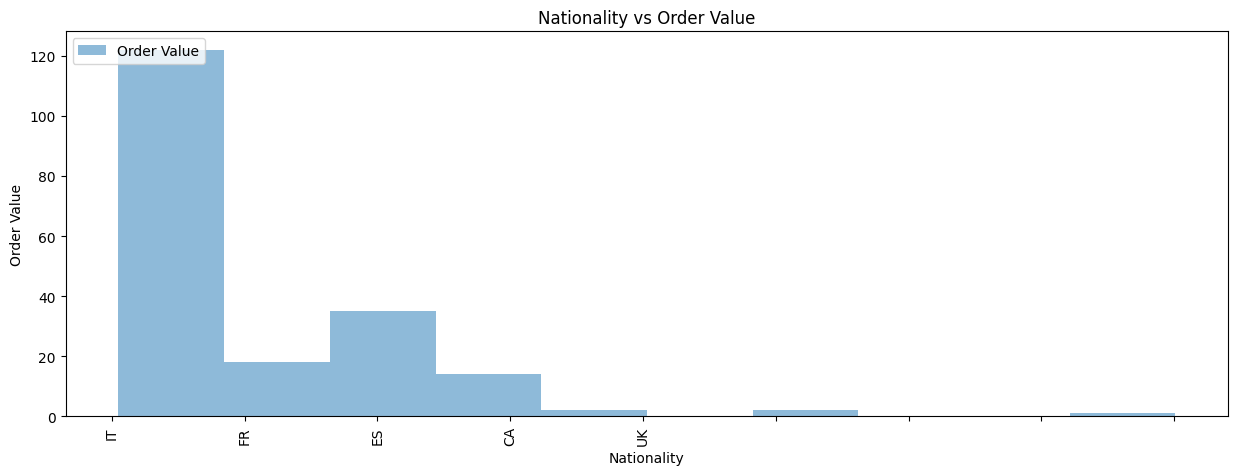

In [28]:
nationality = dataframe['NATIONALITY']
order_value = dataframe['ORDER_VALUE']

# Get unique nationality values and their counts
unique_nationalities = nationality.unique()
nationality_counts = nationality.value_counts()

# Create the histogram
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(order_value, bins=10, alpha=0.5, label='Order Value')

# Set x-axis ticks and labels
ax.set_xticklabels(unique_nationalities, rotation=90)  # Set labels and rotate

# Set title and labels
ax.set_title("Nationality vs Order Value")
ax.set_xlabel("Nationality")
ax.set_ylabel("Order Value")

# Display legend
ax.legend(loc="upper left")

# Show the plot
plt.show()

**4. Nationality vs order value. Histogram using Plotly**

In [17]:
px.histogram(dataframe, x="NATIONALITY", y="ORDER_VALUE", title="Nationality vs order value")

**Lets check again all the columns we have to make more visualizations**

In [18]:
columns = dataframe.columns
print(columns)

Index(['CUST_NAME', 'Gender_Code', 'ADDRESS1', 'CITY', 'STATE', 'COUNTRY_CODE',
       'POSTAL_CODE', 'POSTAL_CODE_PLUS4', 'ADDRESS2', 'EMAIL_ADDRESS',
       'PHONE_NUMBER', 'CREDITCARD_TYPE', 'LOCALITY', 'SALESMAN_ID',
       'NATIONALITY', 'NATIONAL_ID', 'CREDITCARD_NUMBER', 'DRIVER_LICENSE',
       'CUST_ID', 'ORDER_ID', 'ORDER_DATE', 'ORDER_TIME', 'FREIGHT_CHARGES',
       'ORDER_SALESMAN', 'ORDER_POSTED_DATE', 'ORDER_SHIP_DATE', 'AGE',
       'ORDER_VALUE', 'T_TYPE', 'PURCHASE_TOUCHPOINT', 'PURCHASE_STATUS',
       'ORDER_TYPE', 'GENERATION', 'Baby Food', 'Diapers', 'Formula', 'Lotion',
       'Baby wash', 'Wipes', 'Fresh Fruits', 'Fresh Vegetables', 'Beer',
       'Wine', 'Club Soda', 'Sports Drink', 'Chips', 'Popcorn', 'Oatmeal',
       'Medicines', 'Canned Foods', 'Cigarettes', 'Cheese',
       'Cleaning Products', 'Condiments', 'Frozen Foods', 'Kitchen Items',
       'Meat', 'Office Supplies', 'Personal Care', 'Pet Supplies', 'Sea Food',
       'Spices'],
      dtype='object'

**Lets have a look at the pariplot but for the 1/10 of the data**

I suppose this could be one step of veryfying if the plots taken out from the seaborn pairplot function, take too much space or not. I am leaving all of them here, to have a comparison.

Even 1/10 of the data is very big, so lets try 1/100 of the data

In [ ]:
sns.pairplot(dataframe.sample(frac=0.001))

**Lets take a look again at the columns and ake some plotting using both matplotlib and plotly.**

In [19]:
columns = dataframe.columns
print(columns)

Index(['CUST_NAME', 'Gender_Code', 'ADDRESS1', 'CITY', 'STATE', 'COUNTRY_CODE',
       'POSTAL_CODE', 'POSTAL_CODE_PLUS4', 'ADDRESS2', 'EMAIL_ADDRESS',
       'PHONE_NUMBER', 'CREDITCARD_TYPE', 'LOCALITY', 'SALESMAN_ID',
       'NATIONALITY', 'NATIONAL_ID', 'CREDITCARD_NUMBER', 'DRIVER_LICENSE',
       'CUST_ID', 'ORDER_ID', 'ORDER_DATE', 'ORDER_TIME', 'FREIGHT_CHARGES',
       'ORDER_SALESMAN', 'ORDER_POSTED_DATE', 'ORDER_SHIP_DATE', 'AGE',
       'ORDER_VALUE', 'T_TYPE', 'PURCHASE_TOUCHPOINT', 'PURCHASE_STATUS',
       'ORDER_TYPE', 'GENERATION', 'Baby Food', 'Diapers', 'Formula', 'Lotion',
       'Baby wash', 'Wipes', 'Fresh Fruits', 'Fresh Vegetables', 'Beer',
       'Wine', 'Club Soda', 'Sports Drink', 'Chips', 'Popcorn', 'Oatmeal',
       'Medicines', 'Canned Foods', 'Cigarettes', 'Cheese',
       'Cleaning Products', 'Condiments', 'Frozen Foods', 'Kitchen Items',
       'Meat', 'Office Supplies', 'Personal Care', 'Pet Supplies', 'Sea Food',
       'Spices'],
      dtype='object'

**We are going to compare the following data:


*   Customer name vs customer id: using scatter plot.
*   Order posted date vs order ship data: when order is placed earlier does it mean it will be shipped earlier?

**




**Cutomer name vs customer id using a scatter plot: matplotlib + plotly**

**Cutomer name vs customer id using a scatter plot: matplotlib**

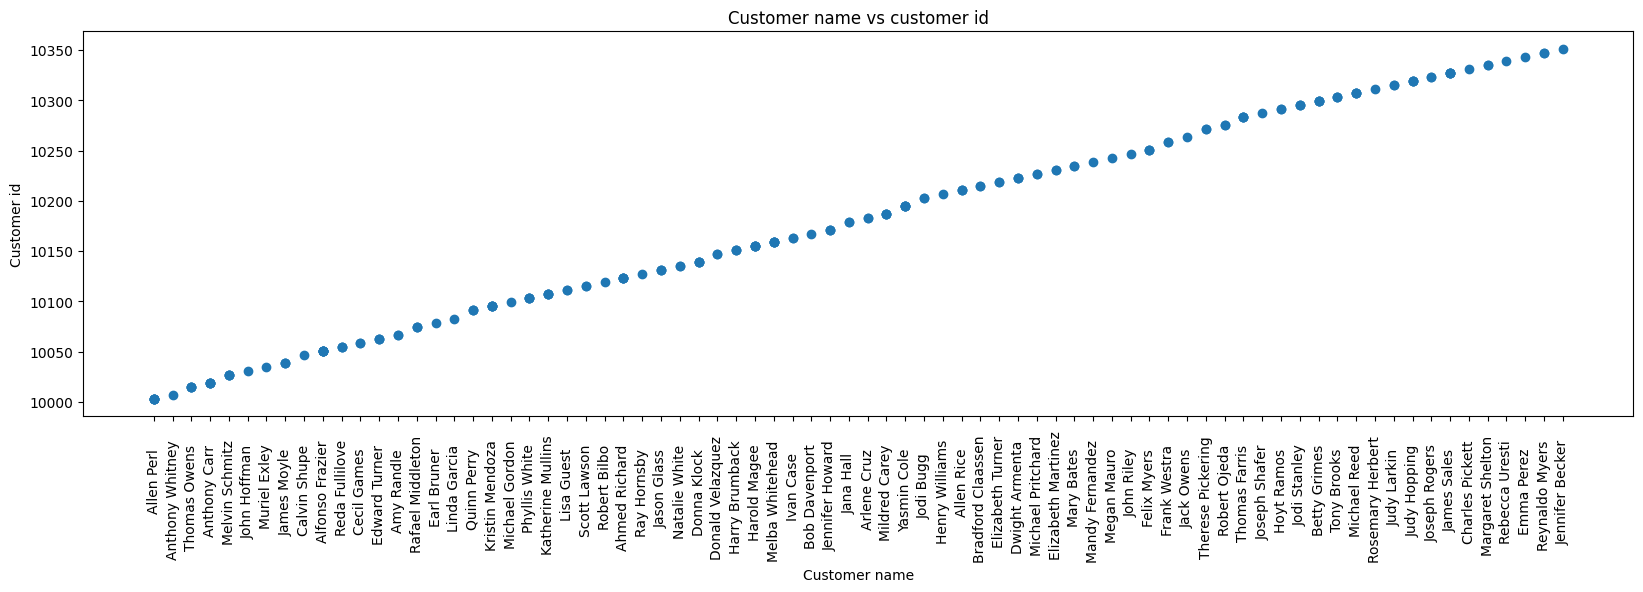

In [20]:
customer_name = dataframe['CUST_NAME']
customer_id = dataframe['CUST_ID']

plt.figure(figsize=(20, 5))
plt.scatter(customer_name, customer_id)
plt.xticks(rotation=90)
plt.title("Customer name vs customer id")
plt.xlabel("Customer name")
plt.ylabel("Customer id")
plt.show()

**Cutomer name vs customer id using a scatter plot: plotly**

In [21]:
px.scatter(dataframe, x="CUST_NAME", y="CUST_ID", title="Customer name vs customer id")

**Order posted date vs order ship date: matplotlib + plotly**

**Order posted date vs order ship date: matplotlib**

**Order posted date vs order ship date: plotly**

In [23]:
px.scatter(dataframe, x="ORDER_POSTED_DATE", y="ORDER_SHIP_DATE", title="Order posted date vs order ship date")

**Lets see again what columns we have and have and insight what data we can use for a pie chart**

In [24]:
columns = dataframe.columns
print(columns)

Index(['CUST_NAME', 'Gender_Code', 'ADDRESS1', 'CITY', 'STATE', 'COUNTRY_CODE',
       'POSTAL_CODE', 'POSTAL_CODE_PLUS4', 'ADDRESS2', 'EMAIL_ADDRESS',
       'PHONE_NUMBER', 'CREDITCARD_TYPE', 'LOCALITY', 'SALESMAN_ID',
       'NATIONALITY', 'NATIONAL_ID', 'CREDITCARD_NUMBER', 'DRIVER_LICENSE',
       'CUST_ID', 'ORDER_ID', 'ORDER_DATE', 'ORDER_TIME', 'FREIGHT_CHARGES',
       'ORDER_SALESMAN', 'ORDER_POSTED_DATE', 'ORDER_SHIP_DATE', 'AGE',
       'ORDER_VALUE', 'T_TYPE', 'PURCHASE_TOUCHPOINT', 'PURCHASE_STATUS',
       'ORDER_TYPE', 'GENERATION', 'Baby Food', 'Diapers', 'Formula', 'Lotion',
       'Baby wash', 'Wipes', 'Fresh Fruits', 'Fresh Vegetables', 'Beer',
       'Wine', 'Club Soda', 'Sports Drink', 'Chips', 'Popcorn', 'Oatmeal',
       'Medicines', 'Canned Foods', 'Cigarettes', 'Cheese',
       'Cleaning Products', 'Condiments', 'Frozen Foods', 'Kitchen Items',
       'Meat', 'Office Supplies', 'Personal Care', 'Pet Supplies', 'Sea Food',
       'Spices'],
      dtype='object'

**For pie chart we are going to use the following:**

**Credit card type, country code, nationality.**

In [25]:
fig = px.pie(dataframe, names='CREDITCARD_TYPE', title='Credit Card Type Distribution')
fig.show()

fig = px.pie(dataframe, names='COUNTRY_CODE', title='Order Distribution by Country')
fig.show()

fig = px.pie(dataframe, names='NATIONALITY', title='Customer Nationality Distribution')
fig.show()